## Project 2 Part 2 
### Kaylah Benton
#### 003049986

This project focuses on exploring and visualizing key trends in global life expectancy and related health, economic, and social indicators using the `life_expectancy_cleaned.csv` dataset.  

The dataset contains information on:  
- Life expectancy  
- Prevalence of undernourishment  
- CO2 emissions  
- Health and education expenditure  
- Unemployment  
- Corruption, sanitation, injuries  
- Communicable and noncommunicable diseases  

The goal is to understand distributions, comparisons across groups, and relationships between variables using Matplotlib and Seaborn visualizations. Each visualization includes a title, axis labels, and interpretation to clearly communicate insights.

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("life_expectancy_cleaned.csv")

# Display first few rows
df.head()

,Unnamed: 0,Country_Name,Country_Code,Region,IncomeGroup,Year,Life_Expectancy_World_Bank,Prevelance_of_Undernourishment,CO2,Health_Expenditure,Education_Expenditure,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable,Health_Investment_Index
0,0,Afghanistan,AFG,South Asia,Low income,2001,56.308000,47.8,730.0,9.861581,3.373310,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38,NaN
1,1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059000,67.5,15960.0,4.483516,3.876120,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34,NaN
2,2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288000,4.9,3230.0,7.139524,3.458700,18.575001,NaN,40.520895,117081.67,140894.78,532324.75,10.598224
3,3,Andorra,AND,Europe & Central Asia,High income,2001,79.759756,NaN,520.0,5.865939,5.062995,NaN,NaN,21.788660,1697.99,695.56,13636.64,NaN
4,4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544000,2.8,97200.0,2.484370,4.771480,2.493000,NaN,NaN,144678.14,65271.91,481740.70,NaN


## Data Cleaning and Wrangling

### 1. Dropped Columns
- We removed columns with **high null values** or those that were **less relevant** to our analysis, such as:  
  - `Corruption`  
  - `Unemployment`  
  - `Prevalence of Undernourishment`  

This helped reduce noise and focus on the most meaningful variables.

### 2. Filled Missing Values
- For columns with missing data, we used the **median of each group** to fill values, ensuring we preserved the overall distribution:  
  - `Life_Expectancy_World_Bank`  
  - `Health_Expenditure`  
  - `Education_Expenditure`  

- This was done using `.groupby().median()` to fill missing values based on relevant categories (e.g., region or income group).

### 3. Sorting the Data
- We sorted the dataset by **life expectancy** from **lowest to highest** to make it easier to identify countries with extreme values and for better visualization and analysis.


# Section 1 Question 1

## 1. Histogram of Life Expectancy

This histogram shows the distribution of life expectancy across countries.  

- **Insight:** Most countries have a life expectancy between 60 and 80 years. Fewer countries have very low (<50 years) or very high (>85 years) life expectancy, indicating a slightly right-skewed distribution.


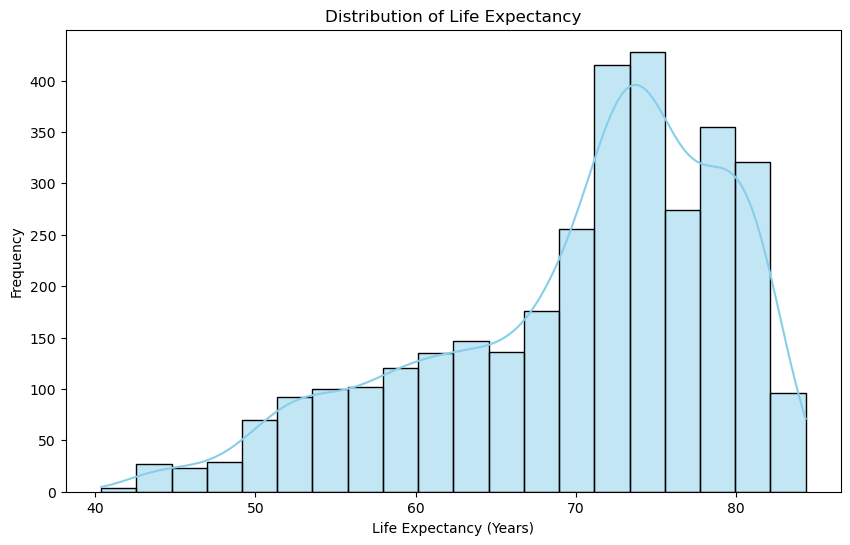

In [2]:
plt.figure(figsize=(10,6))
sns.histplot(df['Life_Expectancy_World_Bank'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')
plt.show()

## 2. Bar Plot: Average Life Expectancy by Income Group

This bar chart shows the **average life expectancy** for each income group. Each income group is represented by a different color to enhance readability.

- **Insight:**  
  - Life expectancy increases with income.  
  - Low-income countries have significantly lower average life expectancy compared to high-income countries, highlighting global health disparities.
  - The data was grouped by `IncomeGroup`, calculating the mean of `Life_Expectancy_World_Bank` for each group.  


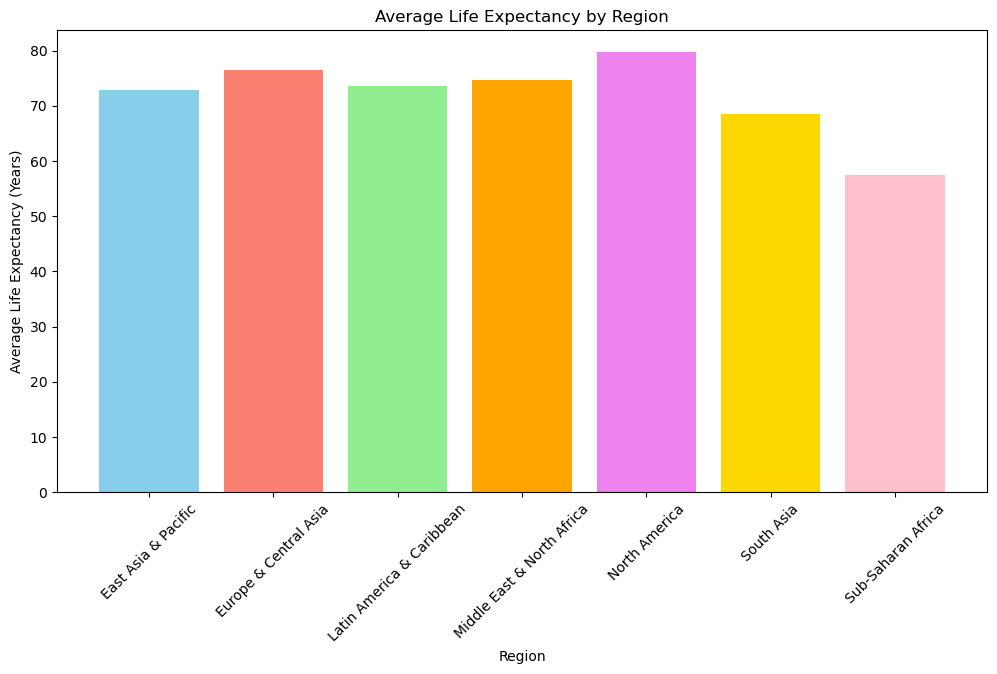

In [3]:
region_avg = df.groupby('Region')['Life_Expectancy_World_Bank'].mean().reset_index()

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet', 'gold', 'pink', 'lightcoral']

plt.figure(figsize=(12,6))

plt.bar(region_avg['Region'], region_avg['Life_Expectancy_World_Bank'], color=colors)

plt.title('Average Life Expectancy by Region')
plt.xlabel('Region')
plt.ylabel('Average Life Expectancy (Years)')
plt.xticks(rotation=45)
plt.show()

## Section I: Distribution and Comparative Visualizations

### 1. Histogram of Life Expectancy

- **What it shows:**  
  The histogram displays how life expectancy values are distributed across all countries in the dataset. Most countries have a life expectancy between **60 and 80 years**, while a smaller number of countries have very low (<50 years) or very high (>85 years) life expectancy.  

- **Interpretation:**  
  - The distribution is slightly right-skewed, indicating a few countries with exceptionally high life expectancy.  
  - Most countries cluster around the middle range, showing that extreme values are relatively rare.  
  - This visualization helps identify global patterns and potential outliers in life expectancy.

### 2. Bar Plot: Average Life Expectancy by Region

- **What it shows:**  
  The bar chart presents the **average life expectancy** for each region. Each bar represents the mean life expectancy of countries within that region, with different colors for clarity.  

- **Interpretation:**  
  - There are clear differences between regions: **Europe & Central Asia** and **North America** have higher average life expectancy, whereas **Sub-Saharan Africa** has the lowest.  
  - This highlights regional disparities in health outcomes and can reflect differences in socioeconomic status, healthcare access, and other structural factors.  
  - Comparing regions provides insight into where life expectancy is relatively high or low and can guide further analysis of contributing factors.


# Section 1 Question 2

## 3. Bar Plot: Average Life Expectancy by Income Group

This bar plot compares average life expectancy across income groups.  

- **Insight:** Life expectancy increases with income. Low-income countries have significantly lower average life expectancy compared to high-income countries, highlighting socioeconomic disparities in health outcomes. We grouped the data by `IncomeGroup` and calculated the mean life expectancy for each group. Each bar represents one income group with a distinct color.


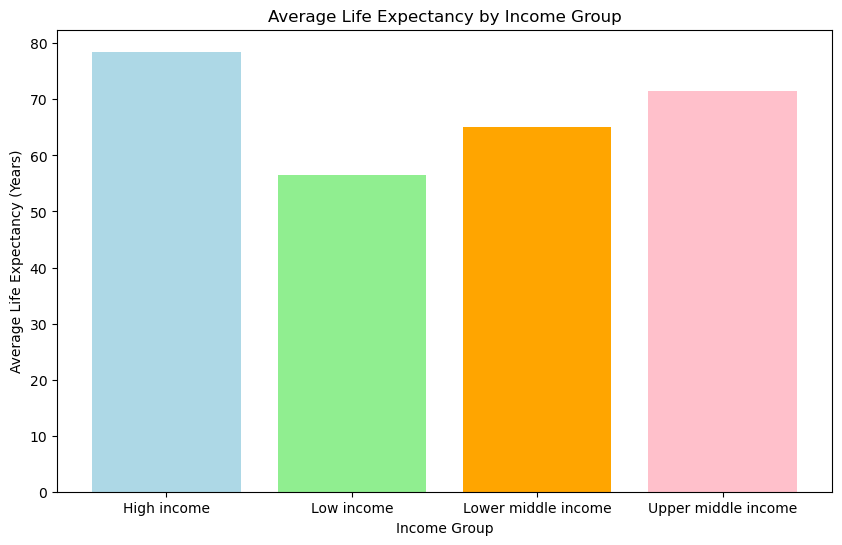

In [4]:
income_group = df.groupby('IncomeGroup')['Life_Expectancy_World_Bank'].mean().reset_index()


colors = ['lightblue', 'lightgreen', 'orange', 'pink']

plt.figure(figsize=(10,6))
bars = plt.bar(
    x=income_group['IncomeGroup'], 
    height=income_group['Life_Expectancy_World_Bank'], 
    color=colors
)

plt.title('Average Life Expectancy by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Life Expectancy (Years)')
plt.show()

# Section 2

## 4. Scatter Plot: Average Life Expectancy vs Unemployment by Region and Income Group

This line plot shows the relationship between **average unemployment** and **average life expectancy** across different **regions** and **income groups**.  

- **What it shows:**  
  - Each line represents a region, and the color indicates the income group.  
  - Markers highlight the average values for each combination of region and income group.  

- **Insight:**  
  - **High-income regions** generally have lower unemployment and higher life expectancy.  
  - **Sub-Saharan Africa** and other lower-income regions tend to have higher unemployment and lower life expectancy.  
  - There is a visible negative relationship: as unemployment increases, life expectancy generally decreases, though the trend varies by region and income group.  
  - The dataset was grouped by `Region` and `IncomeGroup`, averaging both `Unemployment` and `Life_Expectancy_World_Bank`.  

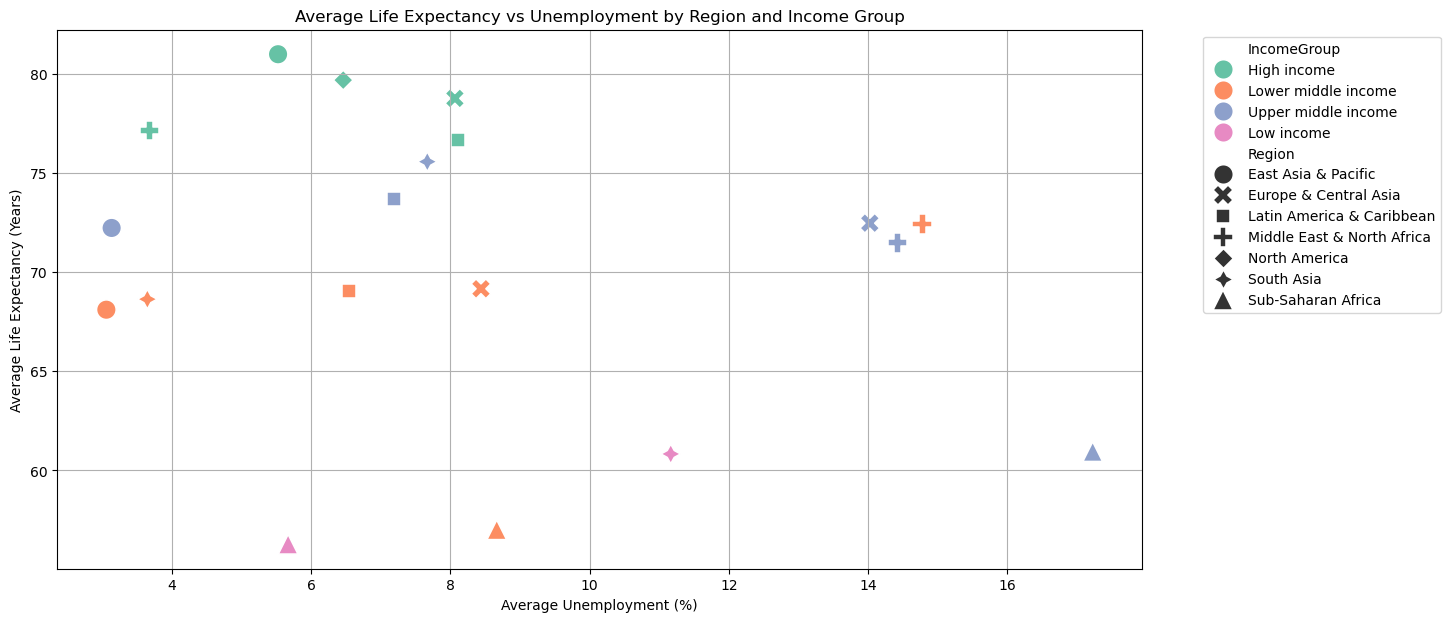

In [5]:
unemployment_group = df.groupby(['Region', 'IncomeGroup'])[['Unemployment', 'Life_Expectancy_World_Bank']].mean().reset_index()

plt.figure(figsize=(14,7))
scatter = sns.scatterplot(
    data=unemployment_group,
    x='Unemployment',
    y='Life_Expectancy_World_Bank',
    hue='IncomeGroup',     
    style='Region',        
    s=200,                
    palette='Set2'
)

plt.title('Average Life Expectancy vs Unemployment by Region and Income Group')
plt.xlabel('Average Unemployment (%)')
plt.ylabel('Average Life Expectancy (Years)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## 5. Correlation Heatmap: Selected Health and Socioeconomic Variables

This heatmap shows the **pairwise correlations** between selected variables related to health, environment, and socioeconomic factors.

- **What it shows:**  
  - Each cell represents the correlation coefficient between two variables, ranging from **-1 (strong negative correlation)** to **+1 (strong positive correlation)**.  
  - Positive correlations are shown in warmer colors (red), negative correlations in cooler colors (blue).  

- **Insights:**  
  - **Life expectancy** is positively correlated with **health expenditure, education expenditure, and sanitation**, indicating that higher investment in health and education and better sanitation are associated with longer lifespans.  
  - **Life expectancy** is negatively correlated with **communicable diseases** and **unemployment**, suggesting that higher rates of disease and unemployment are linked to lower life expectancy.  
  - CO2 emissions show a mild positive correlation with life expectancy, likely reflecting higher industrialization and economic development.  
  - Non-communicable diseases are positively correlated with life expectancy, reflecting that countries with longer lifespans may face more chronic diseases due to aging populations.
  - This heatmap provides a **comprehensive view of how key socioeconomic and health variables are interrelated**, helping identify factors that may influence life expectancy.  
  - Strong correlations can guide further analysis and policy focus for improving population health outcomes.


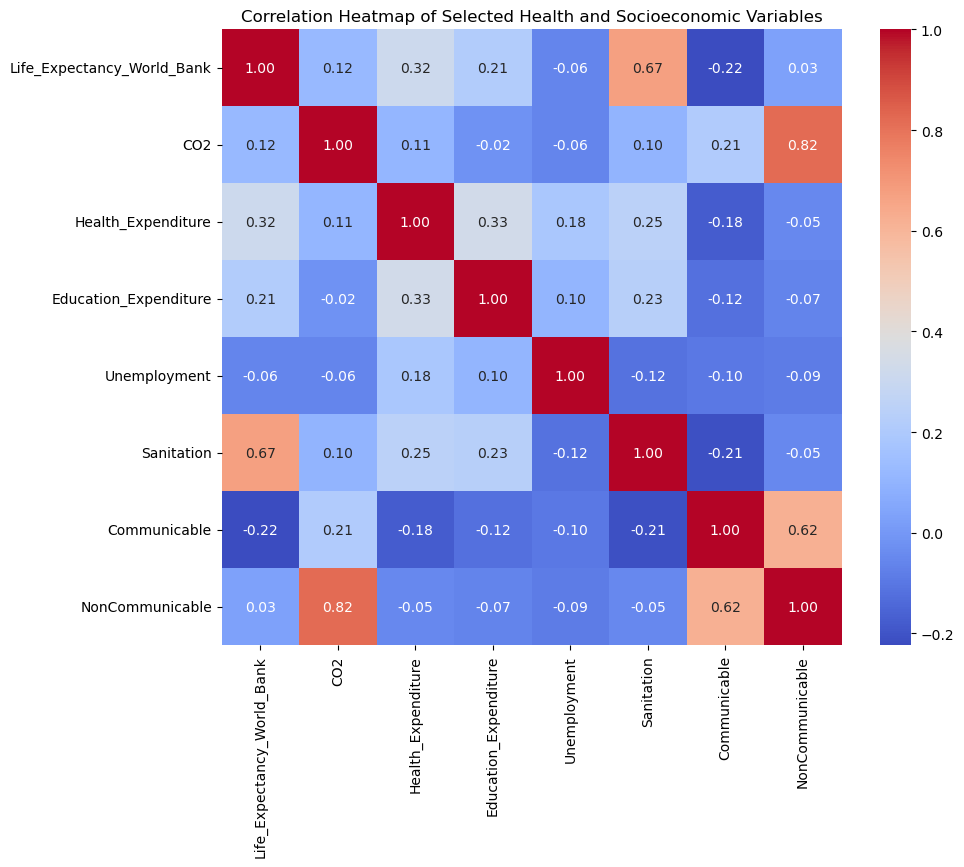

In [6]:
selected_cols = ['Life_Expectancy_World_Bank', 'CO2', 'Health_Expenditure', 
                 'Education_Expenditure', 'Unemployment', 'Sanitation', 
                 'Communicable', 'NonCommunicable']

plt.figure(figsize=(10,8))
corr = df[selected_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Health and Socioeconomic Variables')
plt.show()

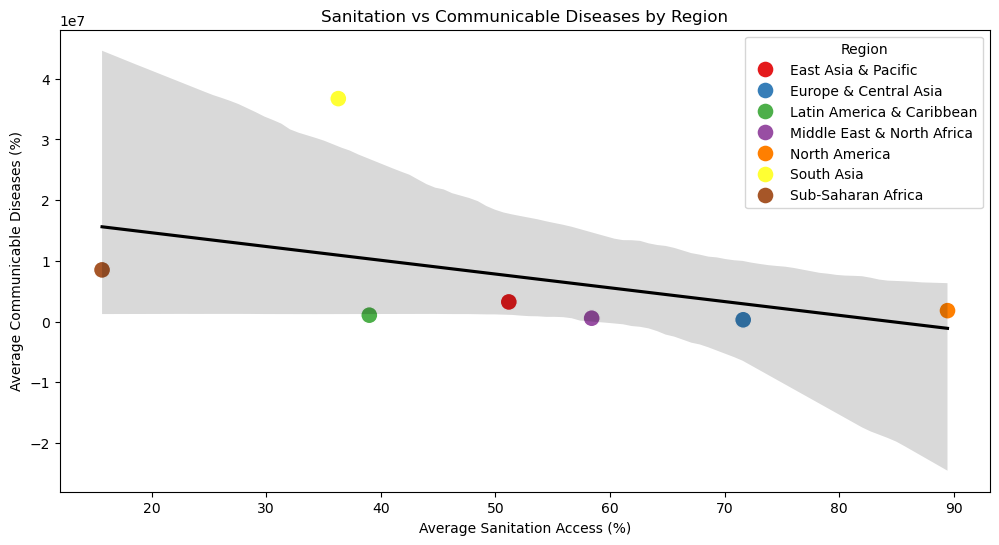

In [7]:
sanitation_group = df.groupby('Region')[['Sanitation', 'Communicable']].mean().reset_index()

plt.figure(figsize=(12,6))
sns.scatterplot(data=sanitation_group, x='Sanitation', y='Communicable', hue='Region', s=150, palette='Set1')
sns.regplot(data=sanitation_group, x='Sanitation', y='Communicable', scatter=False, color='black')
plt.title('Sanitation vs Communicable Diseases by Region')
plt.xlabel('Average Sanitation Access (%)')
plt.ylabel('Average Communicable Diseases (%)')
plt.show()

### Observations

**Correlation Heatmap:**  
- **Trends/Correlations:**  
  - Life expectancy is **positively correlated** with health expenditure, education expenditure, and sanitation.  
  - Life expectancy is **negatively correlated** with unemployment and prevalence of communicable diseases.  
  - CO2 emissions have a mild positive correlation with life expectancy, reflecting more developed/industrialized countries.  
  - Non-communicable diseases show a positive correlation with life expectancy, consistent with aging populations in countries with longer lifespans.  

- **Outliers:**  
  - Countries with very low life expectancy or extreme values in health expenditure, sanitation, or CO2 emissions may appear as outliers.  

**Scatter Plot (Average Life Expectancy vs Unemployment by Region and Income Group):**  
- **Trends/Correlations:**  
  - Higher unemployment tends to correspond to lower life expectancy, although the trend varies by region and income group.  
  - High-income regions generally cluster with **lower unemployment and higher life expectancy**, while low-income regions have **higher unemployment and lower life expectancy**.  

- **Outliers:**  
  - Some countries may have unusually high unemployment but moderate life expectancy, or high life expectancy despite higher unemployment, indicating other socio-economic or healthcare factors at play.  

**Interpretation:**  
- Both visualizations highlight the strong link between socio-economic factors (income, unemployment, expenditure) and health outcomes (life expectancy).  
- They also help identify regions or countries that deviate from the general trends, which could be important for policy analysis or further research.
